<a href="https://colab.research.google.com/github/Huynh-Truong-75/-Homework_ANN/blob/main/food_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tạo Dữ Liệu**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from keras import datasets, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import  image

import numpy as np
import os

mon = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
dir_train = '/content/drive/MyDrive/food' 
distpath = []
y_data = []
x_data = []
x_data = []
y_data = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in mon:
    path = os.path.join(dir,i)
    index_label = mon.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      # img = img.reshape(150,150) 
      img = img.astype('float32')
      img = img/255
      x_data.append(img)
      y_data.append(index_label)
create_data(dir_train, x_data, y_data) #tạo dữ liệu 
# xử lí dữ liệu
x_data = np.array(x_data)
x_data = x_data.reshape(100,150*150*3)
y_data = np.array(y_data)
y_data = np_utils.to_categorical(y_data)
print(x_data.shape)
print(y_data.shape)

(100, 67500)
(100, 5)


In [16]:
from  sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test= train_test_split(x_data, y_data, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

**Xây Dựng Model**

In [17]:
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(256, activation='relu', name='layer2'))
model.add(Dense(128, activation='relu', name='layer3'))
model.add(Dense(5, activation='softmax', name='layer4'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               34560512  
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 5)                 645       
                                                                 
Total params: 34,725,381
Trainable params: 34,725,381
Non-trainable params: 0
_________________________________________________________________


**Train Model**

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs = 50, validation_data=(X_val, y_val))                #, ,batch_size=256
model.save('food.h5')

Epoch 1/50
2/2 [==============================] - 1s 485ms/step - loss: 17.1671 - accuracy: 0.1719 - val_loss: 56.0938 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 1s 481ms/step - loss: 59.9650 - accuracy: 0.2188 - val_loss: 107.9570 - val_accuracy: 0.1250
Epoch 3/50
2/2 [==============================] - 1s 483ms/step - loss: 81.0640 - accuracy: 0.1719 - val_loss: 85.2474 - val_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 1s 570ms/step - loss: 44.4355 - accuracy: 0.2500 - val_loss: 44.4425 - val_accuracy: 0.1875
Epoch 5/50
2/2 [==============================] - 1s 460ms/step - loss: 31.6573 - accuracy: 0.2031 - val_loss: 21.6573 - val_accuracy: 0.3125
Epoch 6/50
2/2 [==============================] - 1s 534ms/step - loss: 12.2947 - accuracy: 0.2812 - val_loss: 5.0957 - val_accuracy: 0.3750
Epoch 7/50
2/2 [==============================] - 1s 483ms/step - loss: 14.2671 - accuracy: 0.1562 - val_loss: 18.2014 - val_accuracy: 0.0000e+0

**Đánh giá model**

In [19]:
score_train = model.evaluate(X_test, y_test)
print('do chinh xac',score_train)

1/1 [==============================] - 0s 102ms/step - loss: 1.5604 - accuracy: 0.3000
do chinh xac [1.5604028701782227, 0.30000001192092896]


**Dự đoán dữ liệu mới**

1/1 [==============================] - 0s 96ms/step
banhmi


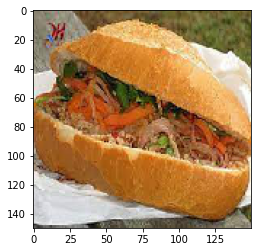

In [20]:
pic = load_img('/content/drive/MyDrive/food/banhmi/20.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model.predict(pic), axis=1))
print(classname[a])
# nhận dạng sai do ít dữ liệu train

1/1 [==============================] - 0s 102ms/step
banhbao


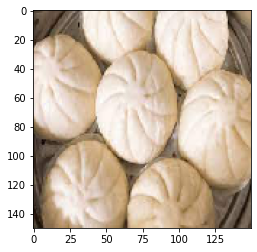

In [21]:
pic = load_img('/content/drive/MyDrive/food/banhbao/10.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
pic = pic.reshape(1,67500)
classname = ['banhbao','banhcuon','banhmi','bunrieu','tomnuong']
a = int(np.argmax(model.predict(pic), axis=1))
print(classname[a])